# 1. AdaBoost

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_excel('./banknote.xlsx')
df = df.drop(["Unnamed: 0"],axis = 1)
df.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### (1) 데이터 셋을 80%는 train 데이터, 20%는 test 데이터로 분리해주세요. (타겟은 class 열입니다)

In [2]:
y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=6)

### (2) 200개의 의사 결정 트리 모형을 개별 모델로 사용하는 에이다부스트 분석기를 만들고 학습시켜주세요.
#### (max_depth=1, algorithm='SAMME', learning_rate=0.5로 설정)

In [3]:
ABC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1),
                         n_estimators=200,
                         algorithm='SAMME',
                         learning_rate=0.5,
                         random_state=6)
ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=6)

### (3) 학습시킨 데이터를 이용하여 예측을 수행하여 주세요. (predictions라는 변수 이름 사용)

In [4]:
predictions = ABC.predict(X_test)

### (4) 오차행렬(confusion matrix)을 이용해 모델을 평가해주세요.

In [5]:
confusion_matrix(y_test, predictions)

array([[149,   0],
       [  0, 126]], dtype=int64)

 # 2. gbm 알고리즘 재현해보기

#### * regression tree를 이용해 gbm 알고리즘을 간단히 재현해보는 문제입니다. (슬라이드40참고) 
#### * 주어진 데이터를 이용하세요
#### * 트리모형의 하이퍼 파라미터는 max_depth = 5만 사용해주세요

In [6]:
import pandas as pd
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

### 1) DecisionTreeRegressor 이용하여 첫번째 weak learner를 만드세요

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# 예?

### 2) 잔차(y - f1(x))를 새로운 목표값 y2라 지정하고 이에 대한 두번째 weak learner를 만드세요

### 3) 다시 잔차(y- f1(x) - f2(x))를 새로운 목표값 y3라 지정하고 이에 대한 세번째 weak learner를 만드세요

### 4) 새롭게 주어진 데이터(X_new)를 대입한 최종 예측값을 출력하세요

In [3]:
X_new = np.array([0.5,0.3,0.1])
X_new = X_new.reshape(-1,1)

# 3. 사이킷런 래퍼 XGBoost

- data.csv를 data1으로 읽어오세요.
- 이 데이터는 음료수를 구분하는 데이터세트 입니다. 
- 타겟은 마지막 열이고, 나머지 열은 피처입니다.
- 타겟 레이블 값의 종류는 0, 1, 2로 각각 음료수1, 음료수2, 음료수3 입니다.

In [24]:
data1 = pd.read_csv('data.csv')

In [25]:
data1.tail()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,2


- train_test_split()에서 test_size은 0.2, random_state은 자신의 나이로 설정합니다.
- xgboost를 사용하여 n_estimators=400, learning_rate=0.1, max_depth=3으로 설정하여 학습합니다.
- fit()함수에서 early_stopping_rounds=100으로 설정해주세요. (하지만 e로 시작하는 다른 하이퍼 파라미터의 대한 값을 변경해야합니다.)

In [26]:
X = data1.drop('N', axis=1)
y = data1['N']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=10)

In [29]:
from xgboost import XGBClassifier

XGBC = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
XGBC.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test,y_test)])

[14:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.00127
[1]	validation_0-mlogloss:0.92115
[2]	validation_0-mlogloss:0.84765
[3]	validation_0-mlogloss:0.78982
[4]	validation_0-mlogloss:0.73796
[5]	validation_0-mlogloss:0.68747
[6]	validation_0-mlogloss:0.64361
[7]	validation_0-mlogloss:0.60543
[8]	validation_0-mlogloss:0.57163
[9]	validation_0-mlogloss:0.54344
[10]	validation_0-mlogloss:0.51704
[11]	validation_0-mlogloss:0.49102
[12]	validation_0-mlogloss:0.47028
[13]	validation_0-mlogloss:0.45326
[14]	validation_0-mlogloss:0.43701
[15]	validation_0-mlogloss:0.42342
[16]	validation_0-mlogloss:0.41044
[17]	validation_0-mlogloss:0.40090
[18]	validation_0-mlogloss:0.39339
[19]	validation_0-mlogloss:0.38373

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- test score의 평균값을 구하세요.(cv=5)

In [33]:
from sklearn.model_selection import cross_validate

cross_val = cross_validate(estimator=XGBC,
                          X=X,
                          y=y,
                          cv=5)

print(cross_val['test_score'])
print('avg test score: {:.4f}(+/-{:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

- 피처 중요도 그래프를 그리세오.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

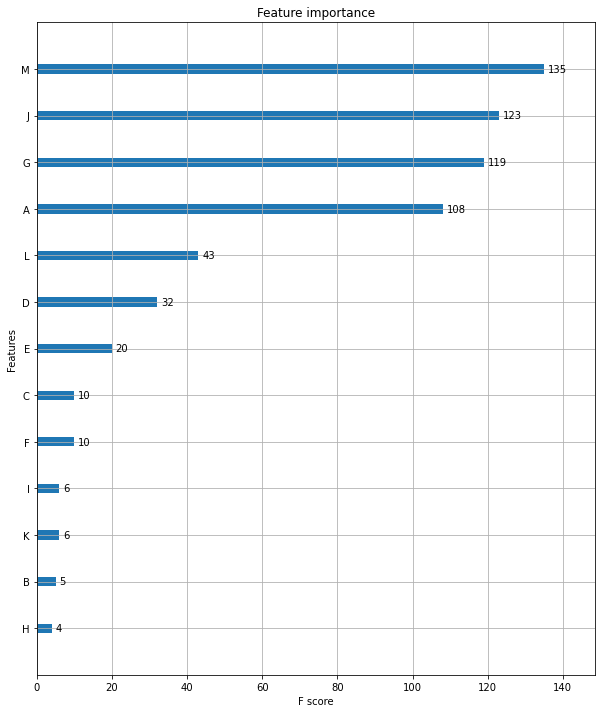

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(XGBC, ax=ax)

- 트리로 시각화하세요.

<AxesSubplot:>

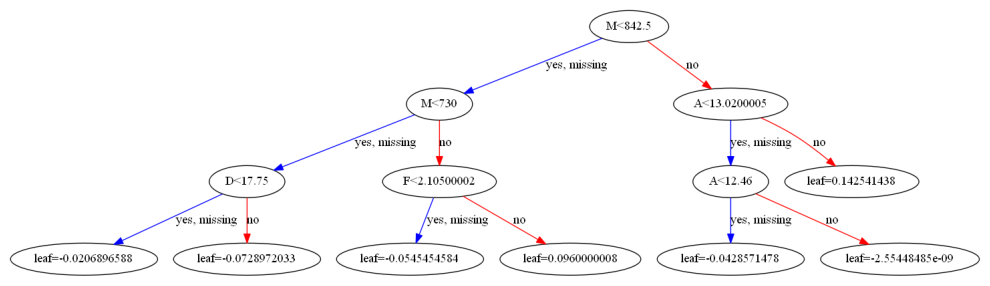

In [69]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (20,5)
plot_tree(XGBC)

# 4. 사이킷런 래퍼 LightGBM

- data.csv를 다시 로드하여 data2로 읽어오세요.
- 타겟은 마지막 M이고, M열을 제외한 나머지 열은 피처입니다.
- 타겟 레이블 채소 파(cm)의 길이입니다.

In [80]:
data2 = pd.read_csv('data.csv')
X = data2.drop('N', axis=1)
y = data2['N']

data2.tail()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,2


- train_test_split()에서 test_size은 0.2, random_state은 자신의 나이+10으로 설정합니다.
- lightgbm를 사용하여 n_estimators=400으로 설정하여 학습합니다.
- fit()함수에서 early_stopping_rounds=100으로 설정해주세요.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(n_estimators=400)
lgbmc.fit(X_train, y_train, early_stopping_rounds=100,eval_set=(X_test,y_test))

[1]	valid_0's multi_logloss: 0.989851
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.883733
[3]	valid_0's multi_logloss: 0.791286
[4]	valid_0's multi_logloss: 0.720518
[5]	valid_0's multi_logloss: 0.655596
[6]	valid_0's multi_logloss: 0.60286
[7]	valid_0's multi_logloss: 0.559521
[8]	valid_0's multi_logloss: 0.509836
[9]	valid_0's multi_logloss: 0.462974
[10]	valid_0's multi_logloss: 0.4288
[11]	valid_0's multi_logloss: 0.395199
[12]	valid_0's multi_logloss: 0.366358
[13]	valid_0's multi_logloss: 0.345652
[14]	valid_0's multi_logloss: 0.322672
[15]	valid_0's multi_logloss: 0.301335
[16]	valid_0's multi_logloss: 0.286045
[17]	valid_0's multi_logloss: 0.269233
[18]	valid_0's multi_logloss: 0.252422
[19]	valid_0's multi_logloss: 0.243212
[20]	valid_0's multi_logloss: 0.227516
[21]	valid_0's multi_logloss: 0.215545
[22]	valid_0's multi_logloss: 0.200026
[23]	valid_0's multi_logloss: 0.191708
[24]	valid_0's multi_logloss: 0.181958
[25]	valid_0's

LGBMClassifier(n_estimators=400)

- test score의 평균값을 구하세요.(cv=5)

In [83]:
from sklearn.model_selection import cross_validate

cross_val = cross_validate(estimator=lgbmc,
                          X=X,
                          y=y,
                          cv=5)

print(cross_val['test_score'])
print('avg test score: {:.4f}(+/-{:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[0.97222222 0.97222222 0.97222222 0.97142857 1.        ]
avg test score: 0.9776(+/-0.0112)


- 피처 중요도 그래프를 그리세오.

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

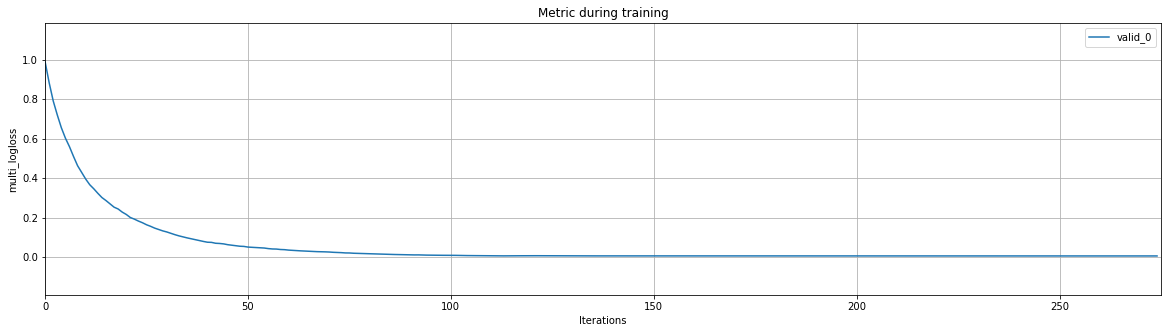

In [85]:
from lightgbm import plot_metric
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

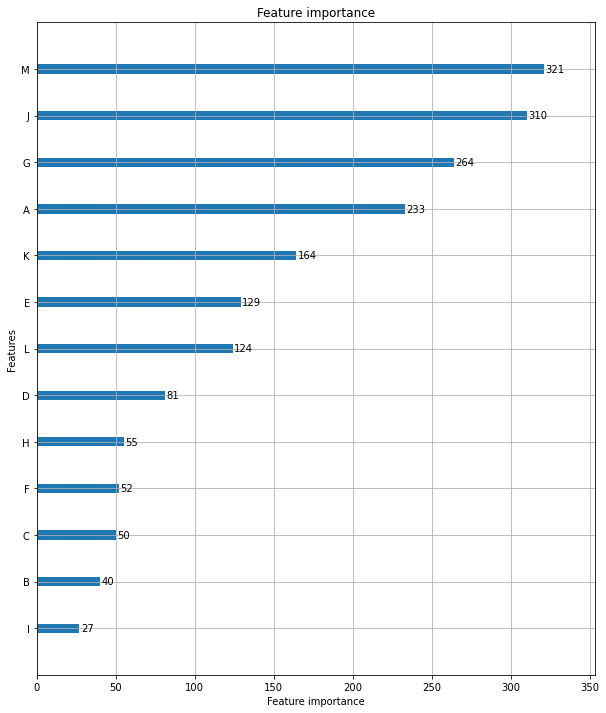

In [87]:
from lightgbm import plot_importance

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbmc, ax=ax)

- 트리로 시각화하세요.

<AxesSubplot:>

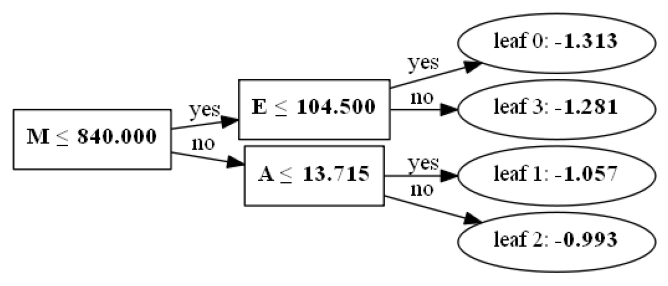

In [89]:
from lightgbm import plot_tree
plot_tree(lgbmc)